<a href="https://colab.research.google.com/github/Mahdi-N-13/security-adversarioal-dos-attack/blob/main/02_perturbed_features_NN___security_adversarioal_dos_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('/content/drive/MyDrive/security_adversarioal_dos_attack/data_02_sorted.csv')
# data = data.drop(data.columns[0],axis=1)
data

,diff_srv_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,logged_in,dst_host_srv_serror_rate,serror_rate,srv_serror_rate,count,dst_host_srv_diff_host_rate,level,dst_host_count,dst_host_same_src_port_rate,srv_diff_host_rate,srv_count,dst_host_srv_rerror_rate,rerror_rate,dst_host_rerror_rate,srv_rerror_rate,duration,hot,wrong_fragment,num_access_files,is_guest_login,num_file_creations,su_attempted,num_compromised,num_root,root_shell,num_shells,num_failed_logins,src_bytes,land,dst_bytes,urgent,is_host_login,attack
0,0.15,0.08,1,0.00,0.60,0.00,0,0.00,0.0,0.0,13,0.00,15,255,0.88,0.00,1,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,146,0,0,0,0,1
1,0.07,0.05,26,0.10,0.05,1.00,0,1.00,1.0,1.0,123,0.00,19,255,0.00,0.00,6,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.00,1.00,255,1.00,0.00,0.03,1,0.01,0.2,0.2,5,0.04,21,30,0.03,0.00,5,0.01,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,232,0,8153,0,0,1
3,0.00,1.00,255,1.00,0.00,0.00,1,0.00,0.0,0.0,30,0.00,21,255,0.00,0.09,32,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,199,0,420,0,0,1
4,0.06,0.16,19,0.07,0.07,0.00,0,0.00,0.0,0.0,121,0.00,21,255,0.00,0.00,19,1.00,1.0,1.00,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.06,0.14,25,0.10,0.06,1.00,0,1.00,1.0,1.0,184,0.00,20,255,0.00,0.00,25,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125968,0.00,1.00,244,0.96,0.01,0.00,0,0.00,0.0,0.0,2,0.00,21,255,0.01,0.00,2,0.00,0.0,0.00,0.0,8,0,0,0,0,0,0,0,0,0,0,0,105,0,145,0,0,1
125969,0.00,1.00,30,0.12,0.06,0.72,1,0.00,0.0,0.0,1,0.00,18,255,0.00,0.00,1,0.00,0.0,0.01,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2231,0,384,0,0,1
125970,0.05,0.06,8,0.03,0.05,1.00,0,1.00,1.0,1.0,144,0.00,20,255,0.00,0.00,8,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
n_f = len(data.columns)-1

In [11]:
new_nf = n_f
train_size = 50*10**3
test_size = 50*10**3

x = data.sample(n=len(data.iloc[:,0]))
X_train = x.iloc[:train_size,:new_nf]
Y_train = np.array(x['attack'][:train_size],dtype=bool)
from tensorflow import keras as ks
model = ks.Sequential()
model.add(ks.layers.Dense(8, activation=ks.activations.relu, input_dim = new_nf)  )
model.add(ks.layers.Dense(5, activation=ks.activations.relu)  )
model.add(ks.layers.Dense(2, activation=ks.activations.sigmoid)  )
model.compile(optimizer='adam',
            loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 2s 2ms/step - loss: 6.0379 - accuracy: 0.9384
Epoch 2/50
1563/1563 [==============================] - 2s 2ms/step - loss: 48.4128 - accuracy: 0.8748
Epoch 3/50
1563/1563 [==============================] - 2s 2ms/step - loss: 22.3532 - accuracy: 0.9185
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 18.5081 - accuracy: 0.9430
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 32.7356 - accuracy: 0.9379
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 15.4059 - accuracy: 0.9462
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7770 - accuracy: 0.9494
Epoch 8/50
1563/1563 [==============================] - 2s 2ms/step - loss: 27.6425 - accuracy: 0.9471
Epoch 9/50
1563/1563 [==============================] - 3s 2ms/step - loss: 26.6448 - accuracy: 0.9426
Epoch 10/50
1563/1563 [==============================] - 3s 2ms/step - loss

In [14]:
X_test = x.iloc[-test_size:,:new_nf]
Y_test = np.array(x['attack'][-test_size:],dtype=bool)
Y_pred = model.predict(X_test)
Y_pred

array([[2.4901297e-05, 2.5895397e-09],
       [3.6995894e-01, 6.3004106e-01],
       [0.0000000e+00, 0.0000000e+00],
       ...,
       [1.1962584e-01, 6.8718195e-04],
       [1.0000000e+00, 9.9999905e-01],
       [3.3488512e-02, 2.7659535e-04]], dtype=float32)

In [21]:
y_p = np.argsort(Y_pred)[:,1]

In [45]:
(Y_test==y_p).mean()

0.9478

In [34]:
attc_test = Y_test==1
safe_test = np.invert(attc_test)

In [61]:
X_test_attc = X_test[attc_test]
X_test_safe = X_test[safe_test]
len_attc_test = len(X_test_attc)

detect_Accuracy_u = np.zeros(n_f)
for i in range(n_f):
  X_perturbed = X_test_attc.copy()
  minn,maxx = X_test_safe.iloc[:,i].min(),X_test_safe.iloc[:,i].max()
  X_perturbed.iloc[:,i] = np.random.uniform(minn,maxx,len_attc_test)
  detect_Accuracy_u[i] = np.argsort(model.predict(X_perturbed))[:,1].mean()

In [86]:
detect_Accuracy_UnPerturbed = np.argsort(model.predict(X_test_attc))[:,1].mean()
detect_Accuracy_UnPerturbed

0.9977154413692371

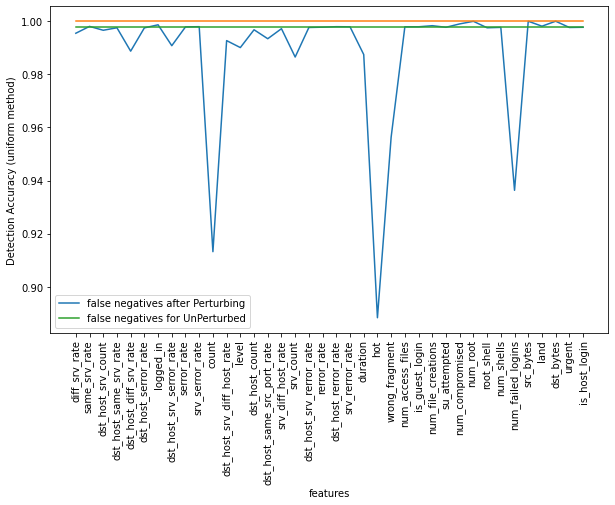

In [90]:
plt.figure(figsize=(10,6))
plt.plot(detect_Accuracy_u,label='true negatives after Perturbing')
# plt.plot([0,n_f-1],[(Y_test==y_p).mean()]*2)
plt.plot([0,n_f-1],[1,1])
plt.plot([0,n_f-1],[detect_Accuracy_UnPerturbed]*2,label='true negatives for UnPerturbed')
plt.xlabel('features')
plt.xticks(range(n_f),data.columns[:-1],rotation='vertical')
plt.ylabel('Detection Accuracy (uniform method)')
plt.legend()

In [57]:
detect_Accuracy_c = np.zeros(n_f)
for i in range(n_f):
  X_perturbed = X_test_attc.copy()
  # minn,maxx = X_test_safe.iloc[:,i].min(),X_test_safe.iloc[:,i].max()
  X_perturbed.iloc[:,i] = np.random.choice(X_test_safe.iloc[:,i],size=len_attc_test)
  detect_Accuracy_c[i] = np.argsort(model.predict(X_perturbed))[:,1].mean()

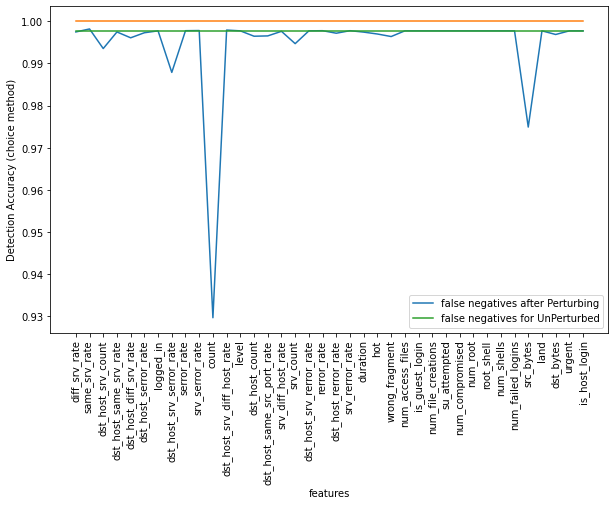

In [89]:
plt.figure(figsize=(10,6))
plt.plot(detect_Accuracy_c,label='true negatives after Perturbing')
# plt.plot([0,n_f-1],[(Y_test==y_p).mean()]*2)
plt.plot([0,n_f-1],[1,1])
plt.plot([0,n_f-1],[detect_Accuracy_UnPerturbed]*2,label='true negatives for UnPerturbed')
plt.xlabel('features')
plt.xticks(range(n_f),data.columns[:-1],rotation='vertical')
plt.ylabel('Detection Accuracy (choice method)')
plt.legend()

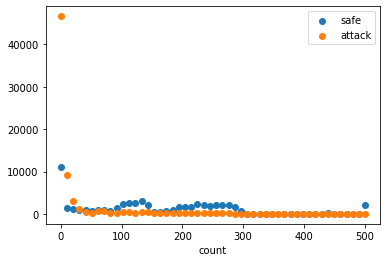

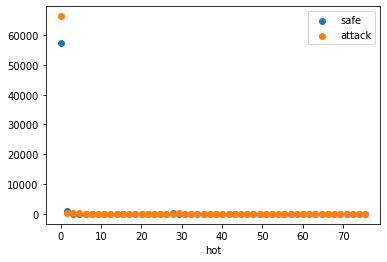

In [75]:
featureZ = ['count','hot']
safe = np.array(data['attack']==0)
attc = np.invert(safe)
for f in featureZ:
  i = np.where(data.columns==f)[0][0]
  minn,maxx = data.iloc[:,i].min(),data.iloc[:,i].max()
  A,x = np.histogram(data.iloc[safe,i],range=(minn,maxx),bins=50)
  B = np.histogram(data.iloc[attc,i],range=(minn,maxx),bins=50)[0]
  plt.scatter(x[:-1],A,label='safe')
  plt.scatter(x[:-1],B,label='attack')
  plt.xlabel(f)
  plt.legend()
  plt.show()

In [78]:
(data['hot']==0).mean()

0.978796875496142

In [80]:
data['hot'][safe].max()

28

In [85]:
for i in np.argsort(detect_Accuracy_c):
  print("{:<30} {:<20}".format(data.columns[i],detect_Accuracy_c[i]))

count                          0.9297030073780008  
src_bytes                      0.9749073068424403  
dst_host_srv_serror_rate       0.9878656230103742  
dst_host_srv_count             0.9935208419160331  
srv_count                      0.9946818471218306  
dst_host_diff_srv_rate         0.9960675630126212  
wrong_fragment                 0.9963671772592787  
dst_host_count                 0.996442080820943   
dst_host_same_src_port_rate    0.9965169843826074  
dst_bytes                      0.996854050410097   
hot                            0.9969664057525935  
dst_host_rerror_rate           0.9971536646567545  
dst_host_serror_rate           0.997266019999251   
duration                       0.9974158271225797  
dst_host_same_srv_rate         0.9974532789034118  
diff_srv_rate                  0.9974532789034118  
srv_diff_host_rate             0.9976030860267405  
su_attempted                   0.9977154413692371  
root_shell                     0.9977154413692371  
num_root    